# Libraries

In [1]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.preprocessing import StandardScaler
# plot feature and overall percent variance
%matplotlib inline
import matplotlib.pyplot as plt

# Loading data set from a01 to a19 for all subjects and all segments into a single Matrix

In [6]:
complete_data = pd.DataFrame()

for i in range(1,20):
    
    if i < 10:
        activity_folder = os.listdir('C:/Users/PazNe/CMPE_255_Data_Mining/Team_5_Daily_And_Sports_Activities_Data_Set/data/a0'+ str(i))
        a='a0'+str(i)
    else:
        activity_folder = os.listdir('C:/Users/PazNe/CMPE_255_Data_Mining/Team_5_Daily_And_Sports_Activities_Data_Set/data/a'+ str(i))    
        a='a'+str(i)
        
    for j in range(1, 9):
        person_folder = os.listdir('C:/Users/PazNe/CMPE_255_Data_Mining/Team_5_Daily_And_Sports_Activities_Data_Set/data/'+ a +'/p'+str(j))
        p='p'+str(j)
        for file in person_folder:
            filepath = 'C:/Users/PazNe/CMPE_255_Data_Mining/Team_5_Daily_And_Sports_Activities_Data_Set/data/'+a+'/'+p+'/'+ file
    
            data = pd.read_csv(filepath, header=None)
            data[45]=p
            complete_data=complete_data.append(data)
    print('Matrix shape after Combining: '+a ,complete_data.shape)


Matrix shape after Combining: a01 (60000, 46)
Matrix shape after Combining: a02 (120000, 46)
Matrix shape after Combining: a03 (180000, 46)
Matrix shape after Combining: a04 (240000, 46)
Matrix shape after Combining: a05 (300000, 46)
Matrix shape after Combining: a06 (360000, 46)
Matrix shape after Combining: a07 (420000, 46)
Matrix shape after Combining: a08 (480000, 46)
Matrix shape after Combining: a09 (540000, 46)
Matrix shape after Combining: a10 (600000, 46)
Matrix shape after Combining: a11 (660000, 46)
Matrix shape after Combining: a12 (720000, 46)
Matrix shape after Combining: a13 (780000, 46)
Matrix shape after Combining: a14 (840000, 46)
Matrix shape after Combining: a15 (900000, 46)
Matrix shape after Combining: a16 (960000, 46)
Matrix shape after Combining: a17 (1020000, 46)
Matrix shape after Combining: a18 (1080000, 46)
Matrix shape after Combining: a19 (1140000, 46)


In [13]:
#Labels for Columns: 
complete_data.columns=['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro','T_ygyro','T_zgyro','T_xmag', 'T_ymag', 'T_zmag', 
'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro','RA_zgyro','RA_xmag', 'RA_ymag', 'RA_zmag', 
'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro','LA_zgyro','LA_xmag', 'LA_ymag', 'LA_zmag', 
'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro','RL_zgyro','RL_xmag', 'RL_ymag', 'RL_zmag', 
'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro','LL_ygyro','LL_zgyro','LL_xmag', 'LL_ymag', 'LL_zmag', 'Person']

In [11]:
complete_data[0:126]

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,Person
0,8.1305,1.0349,5.4217,-0.009461,0.001915,-0.003424,-0.78712,-0.069654,0.15730,0.70097,...,-2.8071,-9.0812,2.6220,-0.000232,-0.012092,-0.004457,0.74017,0.30053,-0.057730,p1
1,8.1305,1.0202,5.3843,-0.009368,0.023485,0.001953,-0.78717,-0.068275,0.15890,0.71829,...,-2.8146,-9.0737,2.6218,-0.014784,-0.016477,0.002789,0.73937,0.30183,-0.057514,p1
2,8.1604,1.0201,5.3622,0.015046,0.014330,0.000204,-0.78664,-0.068277,0.15879,0.69849,...,-2.8221,-9.0886,2.6366,-0.012770,0.005717,-0.007918,0.73955,0.30052,-0.057219,p1
3,8.1603,1.0052,5.3770,0.006892,0.018045,0.005649,-0.78529,-0.069849,0.15912,0.72799,...,-2.8071,-9.0811,2.6070,-0.005725,0.009620,0.006555,0.74029,0.30184,-0.057750,p1
4,8.1605,1.0275,5.3473,0.008811,0.030433,-0.005346,-0.78742,-0.068796,0.15916,0.71572,...,-2.8146,-9.0737,2.6218,-0.003929,-0.008371,0.002816,0.73845,0.30090,-0.057527,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,7.9442,1.1466,5.6080,0.006786,0.001938,0.002946,-0.79034,-0.069965,0.13456,0.61924,...,-2.8229,-9.0750,2.6247,0.001349,0.006134,0.004760,0.73996,0.30132,-0.057530,p1
122,7.9517,1.1466,5.6081,0.000527,0.023588,0.010141,-0.79174,-0.069147,0.13343,0.61443,...,-2.8229,-9.0750,2.6247,-0.005735,-0.001302,-0.007031,0.73945,0.30342,-0.056789,p1
123,7.9743,1.1542,5.5038,0.025818,0.005417,0.006603,-0.79166,-0.070216,0.13478,0.60929,...,-2.8229,-9.1124,2.6246,-0.020267,0.000585,0.000255,0.74030,0.30027,-0.056704,p1
124,7.9812,1.0945,5.6005,-0.005819,0.016371,0.002868,-0.79209,-0.070456,0.13423,0.60939,...,-2.8154,-9.0600,2.6025,-0.003904,-0.006729,-0.009789,0.73897,0.30275,-0.056262,p1


In [ ]:
complete_data.to_pickle('raw_data.pkl')    #to save the dataframe, df to raw_data.pkl


In [2]:
df1 = pd.read_pickle('raw_data.pkl') #to load raw_data.pkl back to the dataframe df1

In [3]:
#Create a second df df2 from df1 with all columns except '45'
my_cols = set(df1.columns)
my_cols.remove('Person')

# This returns an error ("unhashable type: set")
df2 = df1[my_cols]

In [12]:
df2

,RL_ygyro,RA_yacc,RA_xgyro,LA_xgyro,LA_xmag,LL_zgyro,T_xacc,LL_xacc,T_ymag,RA_zgyro,...,LL_yacc,T_zacc,RL_xgyro,RA_ymag,RL_xacc,RL_xmag,RL_ymag,RA_ygyro,LL_zmag,T_zgyro
0,0.007949,5.6829,0.003876,-0.005155,-0.64769,-0.004457,8.13050,-2.8071,-0.069654,-0.001168,...,-9.0812,5.42170,0.004734,-0.55907,-3.51600,0.72985,-0.253660,-0.005213,-0.057730,-0.003424
1,0.002668,5.6005,0.012862,-0.014302,-0.64838,0.002789,8.13050,-2.8146,-0.068275,-0.003029,...,-9.0737,5.38430,0.014458,-0.55684,-3.53860,0.73172,-0.252360,-0.005241,-0.057514,0.001953
2,0.010623,5.6612,0.021639,0.000126,-0.64821,-0.007918,8.16040,-2.8221,-0.068277,0.011992,...,-9.0886,5.36220,-0.009606,-0.55788,-3.53850,0.72914,-0.252490,-0.010421,-0.057219,0.000204
3,0.007971,5.6393,0.016440,0.000092,-0.64841,0.006555,8.16030,-2.8071,-0.069849,0.002322,...,-9.0811,5.37700,0.000949,-0.56833,-3.53850,0.73080,-0.251760,0.001875,-0.057750,0.005649
4,-0.002577,5.6441,0.000286,-0.012524,-0.64909,0.002816,8.16050,-2.8146,-0.068796,0.002425,...,-9.0737,5.34730,-0.009898,-0.55990,-3.53110,0.73035,-0.252350,-0.003408,-0.057527,-0.005346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,-0.072886,15.6680,3.786100,-1.014300,0.45044,-2.082300,16.00800,-10.7520,-0.476070,6.116100,...,4.3231,-0.58220,0.985880,-0.52876,-24.51700,0.92274,-0.069842,0.258940,0.518170,0.584410
121,-0.769440,20.9310,3.195500,0.319530,0.43747,-1.021600,8.28230,-5.1838,-0.472470,4.173500,...,1.2551,0.48698,-1.311200,-0.39274,-27.03700,0.90794,0.128990,0.220800,0.504010,-0.020417
122,-0.606210,21.2490,3.745700,3.439000,0.41556,-0.282080,2.71210,-1.0348,-0.478630,2.468600,...,15.6940,0.84053,0.999530,-0.29845,-11.02500,0.81698,0.149320,0.392190,0.489250,-0.072605
123,0.263540,26.4240,1.695500,1.913300,0.37705,-0.368450,2.03080,-3.6479,-0.482240,-0.387910,...,-7.4632,-0.11264,-1.364200,-0.26256,0.91097,0.81601,0.175560,-0.267580,0.446480,-0.102120


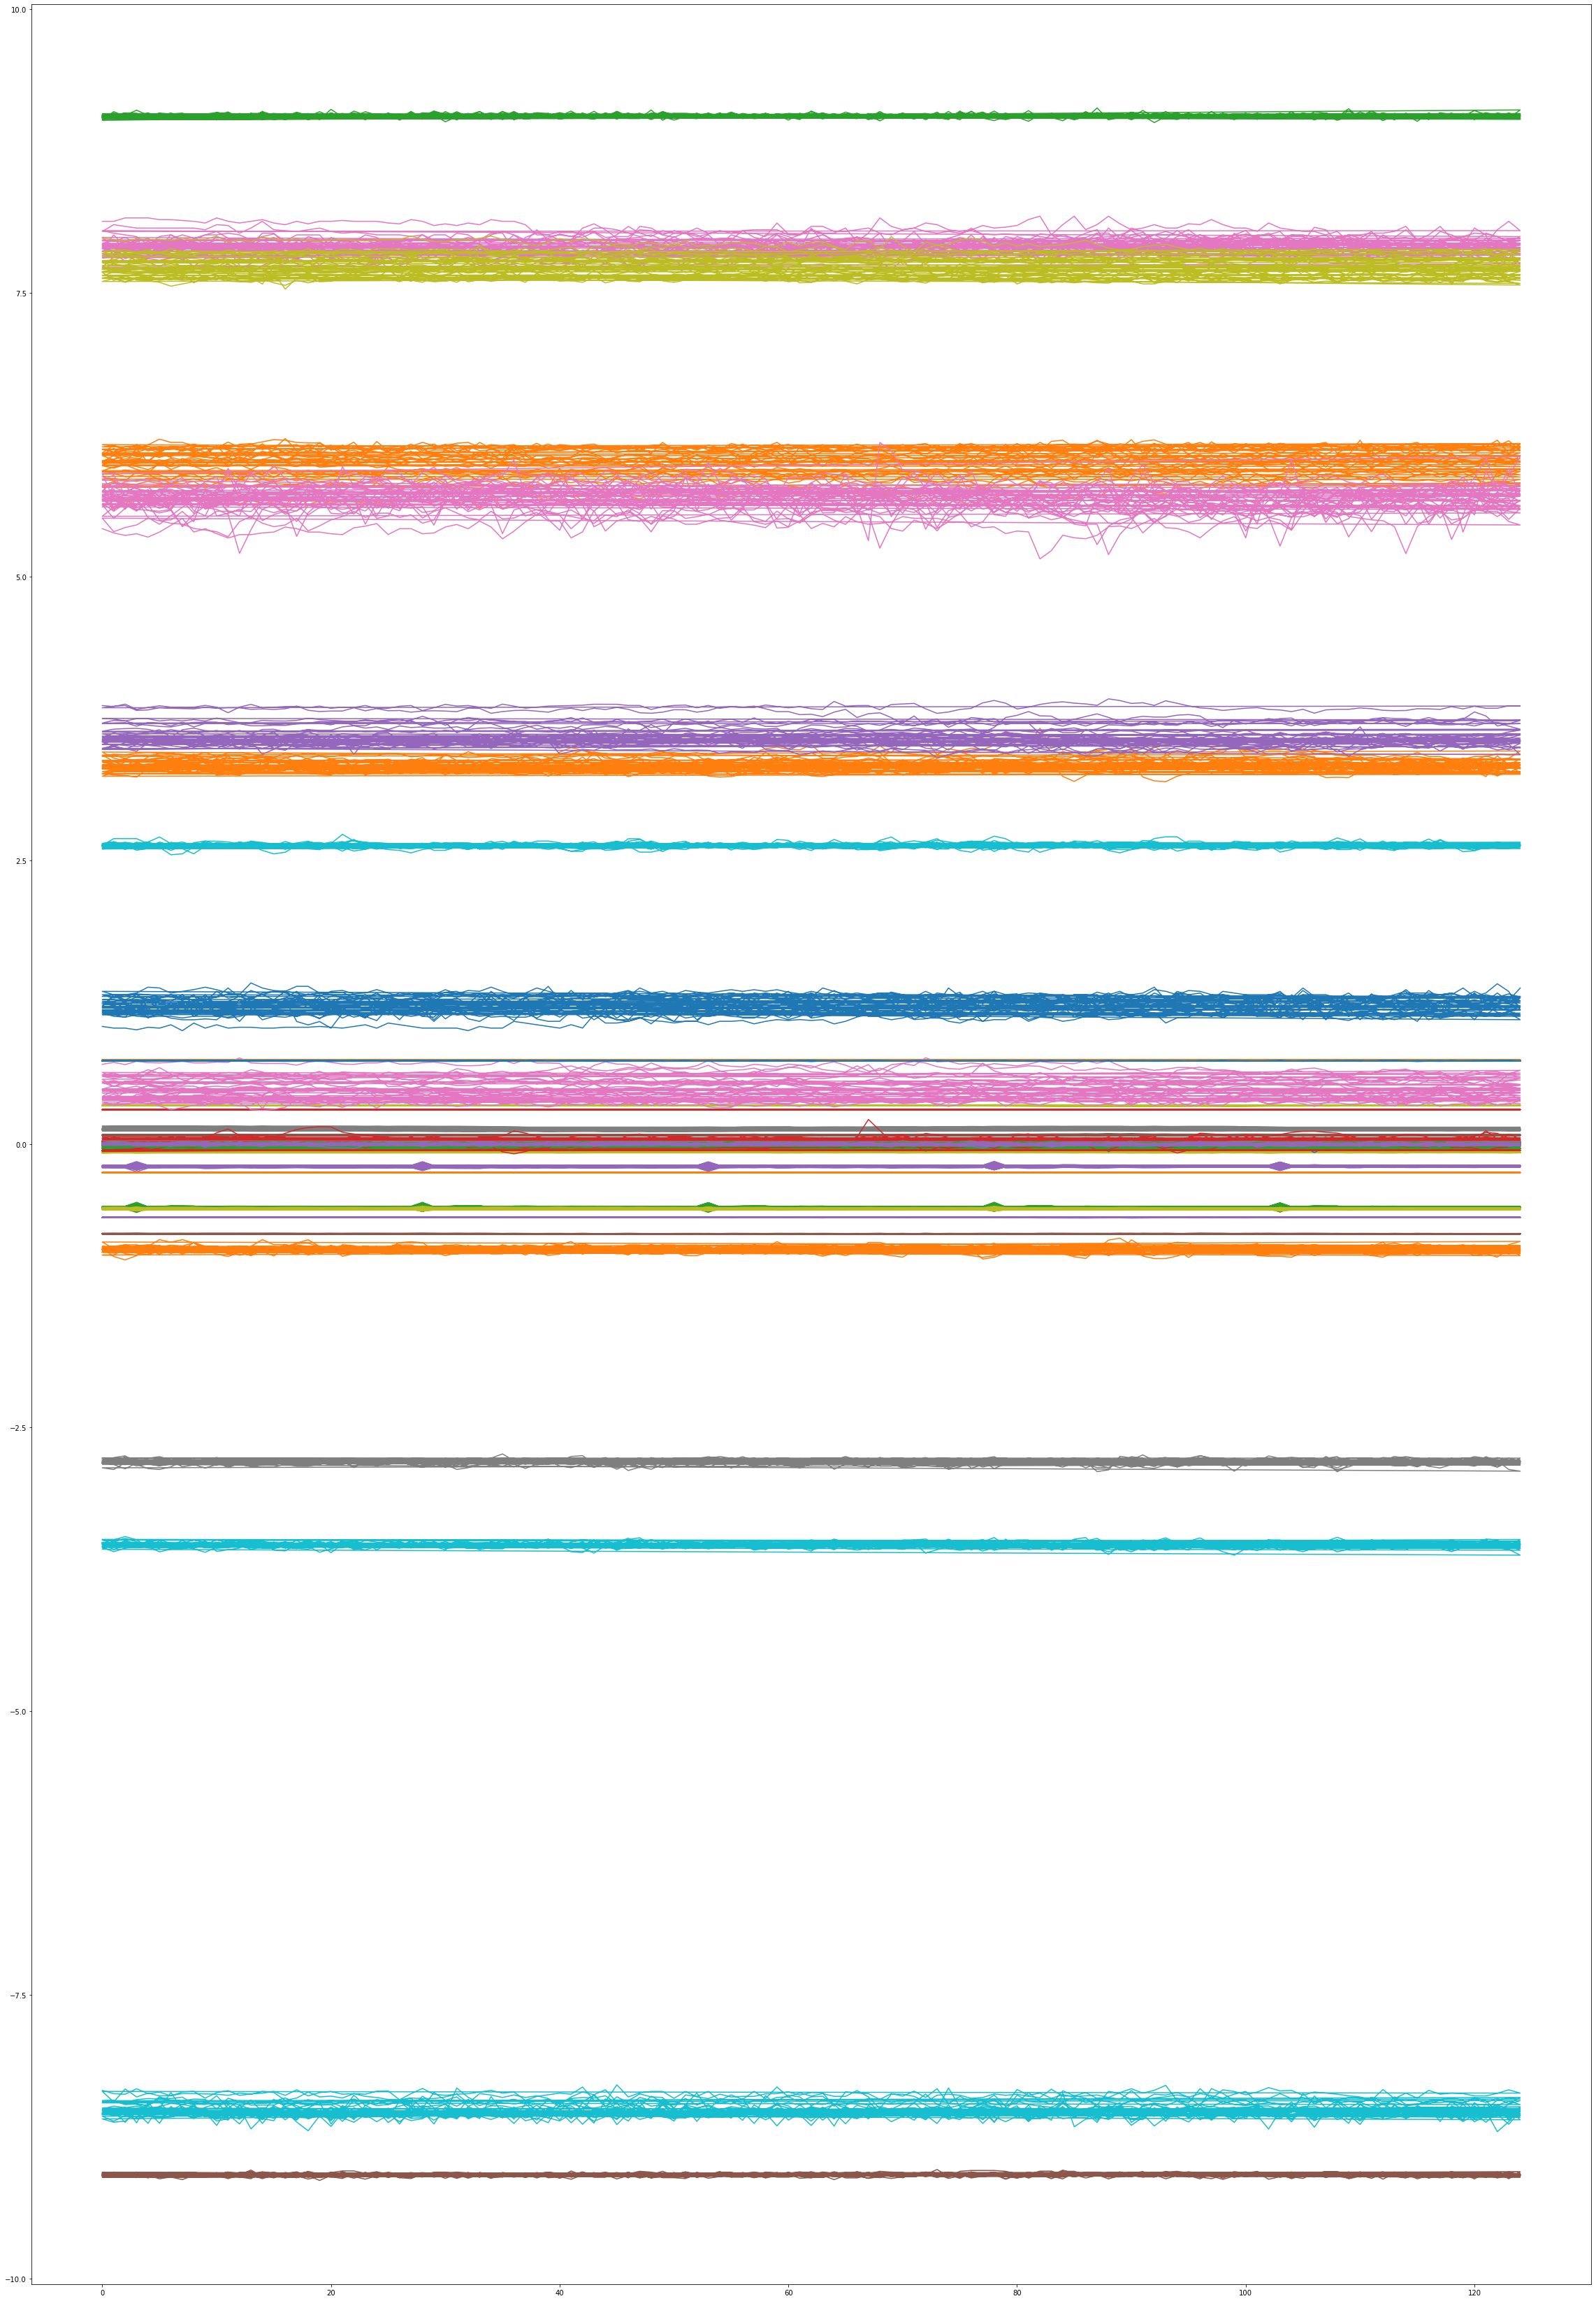

In [5]:
plt.figure(figsize=(40,60))
plt.plot(df2[0:3000])